In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel('tcas.xlsx')

In [3]:
df.dtypes.head()

AcademicYear         int64
AcademicSemester     int64
PrefixName          object
Sex                 object
FacultyID            int64
dtype: object

In [4]:
df.shape

(36401, 79)

In [5]:
df.head()

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student


In [6]:
df.columns

Index(['AcademicYear', 'AcademicSemester', 'PrefixName', 'Sex', 'FacultyID',
       'FacultyName', 'DepartmentCode', 'DepartmentName', 'MajorName',
       'EntryTypeID', 'EntryTypeName', 'EntryGroupID', 'EntryGroupName',
       'TCAS', 'LevelID', 'LevelName', 'LevelNameEng', 'ApplicationDate',
       'EntryGPA', 'HomeRegion', 'StudentTH', 'StudentType', 'Country',
       'SchoolName', 'SchoolProvince', 'ProvinceNameEng', 'SchoolRegion',
       'SchoolRegionName', 'SchoolRegionNameEng', 'NationName', 'ReligionName',
       'GPAX', 'GPA_Eng', 'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
       'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34',
       'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Status'],
      dtype='object')

In [7]:
df = df.drop(columns=['AcademicSemester','PrefixName','MajorName','LevelID','LevelName','LevelNameEng','ApplicationDate','StudentType','SchoolName','SchoolProvince','ProvinceNameEng','SchoolRegion','SchoolRegionName','NationName','FacultyName','DepartmentName','EntryTypeName','EntryTypeName','EntryGroupName'])

In [8]:
df = df.drop(columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34','Q35','Q36','Q37','Q38','Q39','Q40','Q41','Q42'])

In [9]:
df.columns

Index(['AcademicYear', 'Sex', 'FacultyID', 'DepartmentCode', 'EntryTypeID',
       'EntryGroupID', 'TCAS', 'EntryGPA', 'HomeRegion', 'StudentTH',
       'Country', 'SchoolRegionNameEng', 'ReligionName', 'GPAX', 'GPA_Eng',
       'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Status'],
      dtype='object')

In [10]:
df.shape

(36401, 19)

In [11]:
threshold = 50 

In [12]:
df = df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) <= threshold]]
df.reset_index(drop=True, inplace=True)
df.head()

,AcademicYear,Sex,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,EntryGPA,HomeRegion,StudentTH,Country,SchoolRegionNameEng,ReligionName,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Status
0,2562,Female,10,1005,40,623210,5,0.23,International,0,China,Foreign,NaN,0.0,NaN,NaN,NaN,NaN,MFU student
1,2562,Male,10,1005,40,623210,5,3.50,International,0,Korea,Foreign,NaN,0.0,NaN,NaN,NaN,NaN,MFU student
2,2562,Male,10,1005,40,623210,5,NaN,International,0,China,Foreign,NaN,0.0,NaN,NaN,NaN,NaN,MFU student
3,2562,Female,10,1005,40,623210,5,NaN,International,0,China,Foreign,NaN,0.0,NaN,NaN,NaN,NaN,MFU student
4,2562,Female,10,1005,40,623210,5,NaN,International,0,NaN,Foreign,NaN,0.0,NaN,NaN,NaN,NaN,MFU student


In [13]:
len(df[df.duplicated()])

14128

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(22273, 19)

In [16]:
df.describe()

,AcademicYear,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,EntryGPA,StudentTH,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco
count,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,7479.000000,22273.000000,22104.000000,19071.000000,19071.000000,19071.000000,19071.000000
mean,2562.530059,16.609258,1670.281911,23.116194,628422.187536,2.387465,3.118194,0.990167,2.798649,3.280534,2.824017,3.002600,3.456438
std,0.499107,4.910433,486.396547,15.440854,4997.324497,1.464011,0.584635,0.098673,1.193583,0.565389,0.760681,0.612459,0.458136
min,2562.000000,10.000000,1005.000000,10.000000,623010.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.450000,0.620000,0.700000
25%,2562.000000,12.000000,1207.000000,11.000000,623043.000000,1.000000,2.860000,1.000000,2.700000,2.930000,2.250000,2.580000,3.190000
50%,2563.000000,16.000000,1601.000000,20.000000,633011.000000,2.000000,3.190000,1.000000,3.180000,3.380000,2.830000,3.040000,3.550000
75%,2563.000000,21.000000,2101.000000,29.000000,633041.000000,3.000000,3.490000,1.000000,3.550000,3.750000,3.470000,3.500000,3.820000
max,2563.000000,25.000000,2503.000000,69.000000,633601.000000,5.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [17]:
df.isnull().sum()/len(df)*100 

AcademicYear            0.000000
Sex                     0.000000
FacultyID               0.000000
DepartmentCode          0.000000
EntryTypeID             0.000000
EntryGroupID            0.000000
TCAS                    0.000000
EntryGPA               66.421227
HomeRegion              5.176671
StudentTH               0.000000
Country                38.607282
SchoolRegionNameEng    12.665559
ReligionName           13.756566
GPAX                    0.758766
GPA_Eng                14.376150
GPA_Math               14.376150
GPA_Sci                14.376150
GPA_Sco                14.376150
Status                  0.000000
dtype: float64

In [18]:
df[['EntryGPA']]= df.EntryGPA.fillna(df.EntryGPA.mean()) 
df[['GPAX']]= df.GPAX.fillna(df.GPAX.mean()) 
df[['GPA_Eng']]= df.GPA_Eng.fillna(df.GPA_Eng.mean())
df[['GPA_Math']]= df.GPA_Math.fillna(df.GPA_Math.mean())
df[['GPA_Sci']]= df.GPA_Sci.fillna(df.GPA_Sci.mean())
df[['GPA_Sco']]= df.GPA_Sco.fillna(df.GPA_Sco.mean())

In [19]:
df[['HomeRegion']]= df.HomeRegion.fillna(df.HomeRegion.mode()[0]) 
df[['Country']]= df.Country.fillna(df.Country.mode()[0]) 
df[['SchoolRegionNameEng']]= df.SchoolRegionNameEng.fillna(df.SchoolRegionNameEng.mode()[0]) 
df[['ReligionName']]= df.ReligionName.fillna(df.ReligionName.mode()[0])

In [20]:
df.head(100)

,AcademicYear,Sex,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,EntryGPA,HomeRegion,StudentTH,Country,SchoolRegionNameEng,ReligionName,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Status
0,2562,Female,10,1005,40,623210,5,0.230000,International,0,China,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
1,2562,Male,10,1005,40,623210,5,3.500000,International,0,Korea,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
2,2562,Male,10,1005,40,623210,5,3.118194,International,0,China,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
3,2562,Female,10,1005,40,623210,5,3.118194,International,0,China,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
4,2562,Female,10,1005,40,623210,5,3.118194,International,0,Thailand,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
5,2562,Female,10,1005,40,623210,5,1.700000,International,0,China,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
6,2562,Female,10,1005,40,623210,5,3.118194,International,0,Korea,Northern,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
9,2562,Female,10,1005,40,623210,5,3.118194,International,0,Korea,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
10,2562,Male,10,1005,40,623210,5,0.000000,International,0,China,Northern,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student
11,2562,Male,10,1005,40,623210,5,2.900000,International,0,United Kingdom of Great Britain and Northern I...,Foreign,พุทธ,0.000000,3.280534,2.824017,3.0026,3.456438,MFU student


In [21]:
df.isnull().sum()/len(df)*100

AcademicYear           0.0
Sex                    0.0
FacultyID              0.0
DepartmentCode         0.0
EntryTypeID            0.0
EntryGroupID           0.0
TCAS                   0.0
EntryGPA               0.0
HomeRegion             0.0
StudentTH              0.0
Country                0.0
SchoolRegionNameEng    0.0
ReligionName           0.0
GPAX                   0.0
GPA_Eng                0.0
GPA_Math               0.0
GPA_Sci                0.0
GPA_Sco                0.0
Status                 0.0
dtype: float64

In [22]:
num_data = df.select_dtypes(include=['number']) 

cat_data = df.select_dtypes(include=['object']) 

class_traget = df.Status

In [23]:
num_data.head()

,AcademicYear,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,EntryGPA,StudentTH,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco
0,2562,10,1005,40,623210,5,0.230000,0,0.0,3.280534,2.824017,3.0026,3.456438
1,2562,10,1005,40,623210,5,3.500000,0,0.0,3.280534,2.824017,3.0026,3.456438
2,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,2.824017,3.0026,3.456438
3,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,2.824017,3.0026,3.456438
4,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,2.824017,3.0026,3.456438


In [24]:
cat_data.head()

,Sex,HomeRegion,Country,SchoolRegionNameEng,ReligionName,Status
0,Female,International,China,Foreign,พุทธ,MFU student
1,Male,International,Korea,Foreign,พุทธ,MFU student
2,Male,International,China,Foreign,พุทธ,MFU student
3,Female,International,China,Foreign,พุทธ,MFU student
4,Female,International,Thailand,Foreign,พุทธ,MFU student


In [25]:
cat_data = pd.get_dummies(cat_data)
cat_data.head()

,Sex_Female,Sex_Male,HomeRegion_Bankok,HomeRegion_Central,HomeRegion_East,HomeRegion_International,HomeRegion_North,HomeRegion_North East,HomeRegion_South,HomeRegion_West,...,SchoolRegionNameEng_Western,ReligionName_-,ReligionName_คริสต์,ReligionName_ซิกข์,ReligionName_บาไฮ,ReligionName_พุทธ,ReligionName_อิสลาม,ReligionName_ฮินดู,Status_MFU student,Status_Not MFU student
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
transform_num_data = pd.concat([num_data, cat_data], axis=1)
transform_num_data.head()

,AcademicYear,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,EntryGPA,StudentTH,GPAX,GPA_Eng,...,SchoolRegionNameEng_Western,ReligionName_-,ReligionName_คริสต์,ReligionName_ซิกข์,ReligionName_บาไฮ,ReligionName_พุทธ,ReligionName_อิสลาม,ReligionName_ฮินดู,Status_MFU student,Status_Not MFU student
0,2562,10,1005,40,623210,5,0.230000,0,0.0,3.280534,...,0,0,0,0,0,1,0,0,1,0
1,2562,10,1005,40,623210,5,3.500000,0,0.0,3.280534,...,0,0,0,0,0,1,0,0,1,0
2,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,...,0,0,0,0,0,1,0,0,1,0
3,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,...,0,0,0,0,0,1,0,0,1,0
4,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,...,0,0,0,0,0,1,0,0,1,0


In [27]:
transform_num_data.dtypes.head()

AcademicYear      int64
FacultyID         int64
DepartmentCode    int64
EntryTypeID       int64
EntryGroupID      int64
dtype: object

In [28]:
transform_num_data.shape

(22273, 59)

In [29]:
# Defining data features using column names
X = transform_num_data.iloc[:,0:57] 
X.head()

,AcademicYear,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,EntryGPA,StudentTH,GPAX,GPA_Eng,...,SchoolRegionNameEng_Northern,SchoolRegionNameEng_Southern,SchoolRegionNameEng_Western,ReligionName_-,ReligionName_คริสต์,ReligionName_ซิกข์,ReligionName_บาไฮ,ReligionName_พุทธ,ReligionName_อิสลาม,ReligionName_ฮินดู
0,2562,10,1005,40,623210,5,0.230000,0,0.0,3.280534,...,0,0,0,0,0,0,0,1,0,0
1,2562,10,1005,40,623210,5,3.500000,0,0.0,3.280534,...,0,0,0,0,0,0,0,1,0,0
2,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,...,0,0,0,0,0,0,0,1,0,0
3,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,...,0,0,0,0,0,0,0,1,0,0
4,2562,10,1005,40,623210,5,3.118194,0,0.0,3.280534,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# Defining class using column position (Last Column)
Y = class_traget
Y.head()

0    MFU student
1    MFU student
2    MFU student
3    MFU student
4    MFU student
Name: Status, dtype: object

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

E:\Anacoda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anacoda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [32]:
X.shape

(22273, 57)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=4, metric = 'euclidean')
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [34]:
# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)
print('Training Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(Y, y_pred))

Training Accuracy:  0.9168051003457101
Training Classification Error:  0.08319489965428994
Confusion matrix:
[[ 7604   829]
 [ 1024 12816]]


In [35]:
from sklearn.model_selection import train_test_split
# Split training set and test set with ration 70% : 30% by specify test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y)#, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (15591, 57)
y_train shape:  (15591,)
x_test shape:  (6682, 57)
y_test shape:  (6682,)


In [36]:
Y.value_counts()

Not MFU student    13840
MFU student         8433
Name: Status, dtype: int64

In [37]:
y_train.value_counts()

Not MFU student    9688
MFU student        5903
Name: Status, dtype: int64

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 9
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.8461538461538461
Tesing Classification Error:  0.15384615384615385
Confusion matrix:
[[1752  778]
 [ 250 3902]]


In [39]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=9 
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.67818689, 0.69812632, 0.68616581, 0.74104905, 0.72907591]),
 'score_time': array([1.95776629, 2.27793622, 4.44810343, 5.11728668, 4.00326896]),
 'test_score': array([0.66105499, 0.72053872, 0.72008979, 0.75954198, 0.67781769]),
 'train_score': array([0.89577955, 0.89286115, 0.88814682, 0.89230597, 0.89685168])}

In [40]:
# Accuracy score for each fold 
print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Tesing Accuracy for each fold: [0.66105499 0.72053872 0.72008979 0.75954198 0.67781769]
Cross Validation Accuracy: 0.708 +/- 0.035


In [41]:
from sklearn import metrics
k_range = list(range(1,5))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())


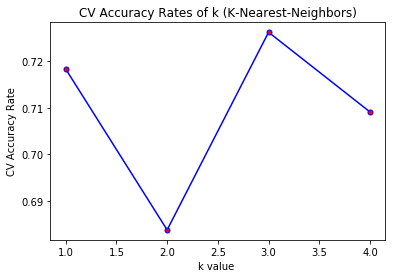

In [42]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [43]:
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index+1, 'accuracy = ', value)

best k =  3 accuracy =  0.7262639275288828


In [44]:
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=6 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [45]:
import pickle

In [46]:
pickle.dump(best_knn, open('best_knn.pkl', 'wb'))
pickle.dump(sc, open('normalization.pkl', 'wb'))